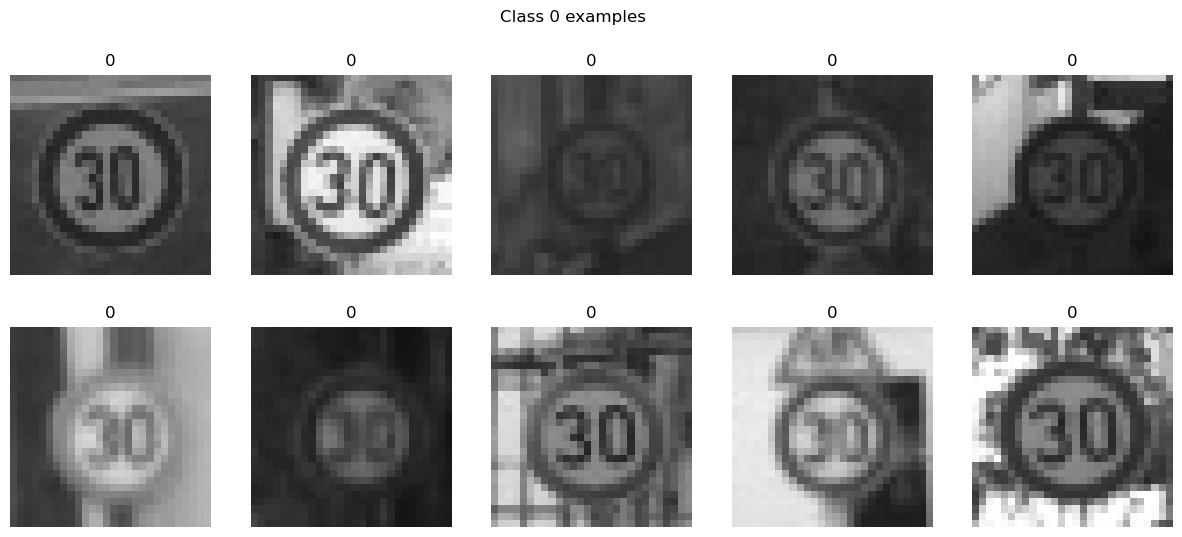

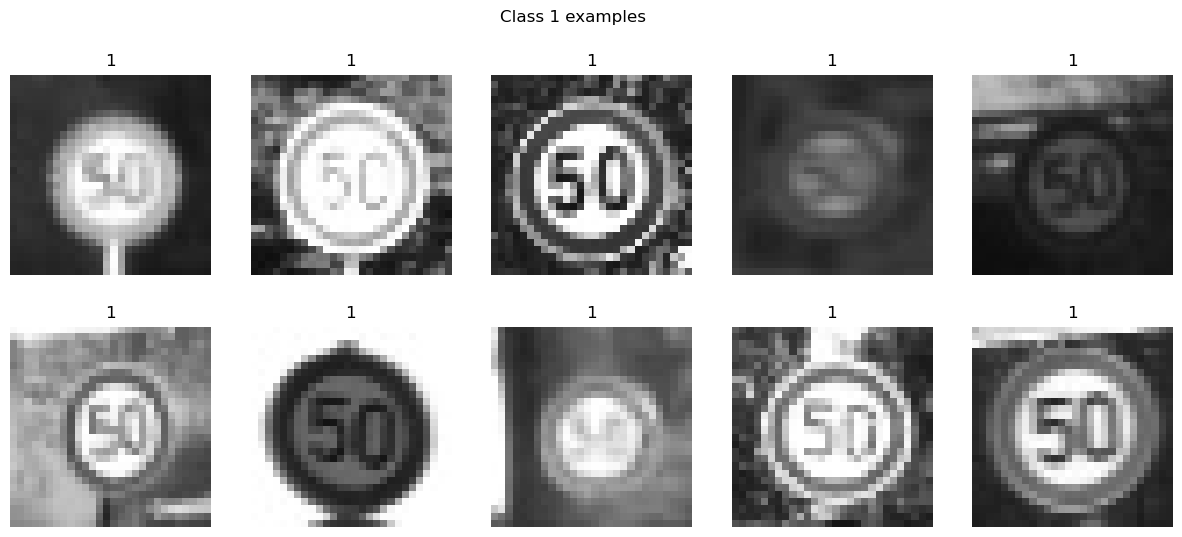

Num samples class_0: 2220
Num samples class_1: 2250


In [15]:
# Load and Visualize Data
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

# Load data
folder = 'C:/Users/user/Documents/GitHub/Computer-Vision-v2/lesson_12/data/subset_homework'

# Load traffic sign class 0
fnames_0 = os.listdir(os.path.join(folder, 'class_id_0'))
images_0 = [cv2.imread(os.path.join(folder, 'class_id_0', f), cv2.IMREAD_UNCHANGED) for f in fnames_0]
labels_0 = [0] * len(images_0)

# Load traffic sign class 1
fnames_1 = os.listdir(os.path.join(folder, 'class_id_1'))
images_1 = [cv2.imread(os.path.join(folder, 'class_id_1', f), cv2.IMREAD_UNCHANGED) for f in fnames_1]
labels_1 = [1] * len(images_1)

# Visualize some examples for class 0
plt.figure(figsize=(15, 6))
for cnt, idx in enumerate(np.random.randint(0, len(images_0), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_0[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_0[idx]), plt.axis(False)

plt.suptitle('Class 0 examples')
plt.show()

# Visualize some examples for class 1
plt.figure(figsize=(15, 6))
for cnt, idx in enumerate(np.random.randint(0, len(images_1), 10)):
    plt.subplot(2, 5, cnt + 1)
    plt.imshow(images_1[idx], cmap='gray', vmin=0, vmax=255)
    plt.title(labels_1[idx]), plt.axis(False)

plt.suptitle('Class 1 examples')
plt.show()

# Count number of images in each class
print('Num samples class_0:', len(images_0))
print('Num samples class_1:', len(images_1))


Shape of images: (4470, 784)
Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3653 - val_loss: 0.2801
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2562 - val_loss: 0.2121
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2095 - val_loss: 0.1835
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1820 - val_loss: 0.1725
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1643 - val_loss: 0.1434
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1485 - val_loss: 0.1374
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1343 - val_loss: 0.1215
Epoch 8/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1208 - val_loss: 0.1144
Epoch 9/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1167 - val_loss: 0.1130
Epoch 10/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1072 - val_loss: 0.1114
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train accuracy with one neuro

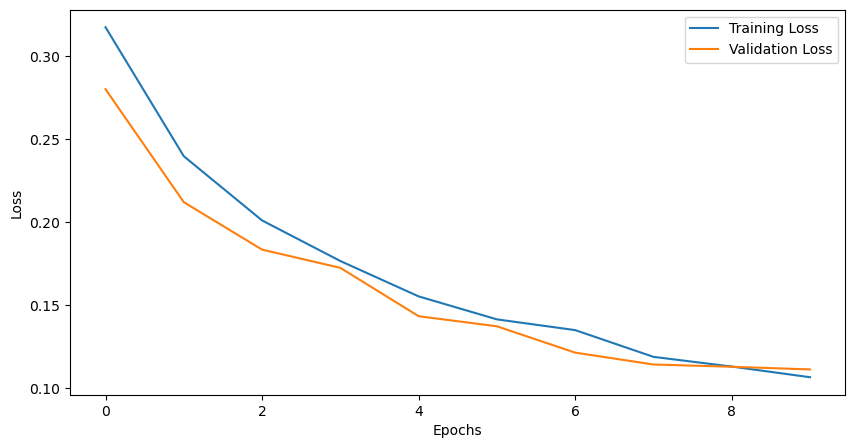

In [16]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

# Prepare data
images = images_0 + images_1
labels = labels_0 + labels_1
images, labels = shuffle(images, labels)
images = np.array([image.flatten() for image in images]) / 255
labels = np.array(labels)

print('Shape of images:', images.shape)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Build the model
inputs = Input(shape=(train_images.shape[1],))
outputs = Dense(1, activation="linear")(inputs)
model = Model(inputs, outputs)

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate accuracy
train_predictions = model.predict(train_images).squeeze()
train_predictions = train_predictions > 0.5
train_accuracy = np.mean(train_predictions == train_labels)

test_predictions = model.predict(test_images).squeeze()
test_predictions = test_predictions > 0.5
test_accuracy = np.mean(test_predictions == test_labels)

print('Train accuracy with one neuron:', train_accuracy)
print('Test accuracy with one neuron:', test_accuracy)

# Plot training history for one neuron
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5737 - loss: 0.6757 - val_accuracy: 0.6510 - val_loss: 0.6165
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7081 - loss: 0.5874 - val_accuracy: 0.7998 - val_loss: 0.4879
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7986 - loss: 0.4687 - val_accuracy: 0.8725 - val_loss: 0.3757
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8663 - loss: 0.3657 - val_accuracy: 0.9273 - val_loss: 0.2912
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8932 - loss: 0.2998 - val_accuracy: 0.9206 - val_loss: 0.2676
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8982 - loss: 0.2793 - val_accuracy: 0.9329 - val_loss: 0.2189
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9328 - loss: 0.2130 - val_accuracy: 0.9418 - val_loss: 0.1952
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9279 - loss: 0.2057 - val_accuracy: 0.

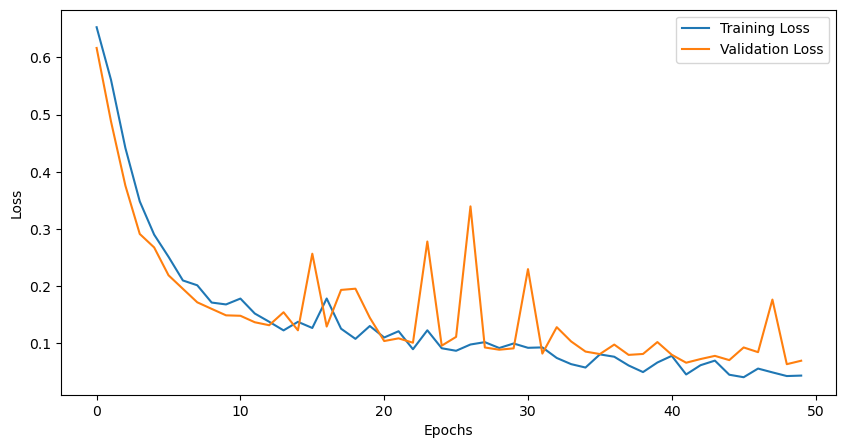

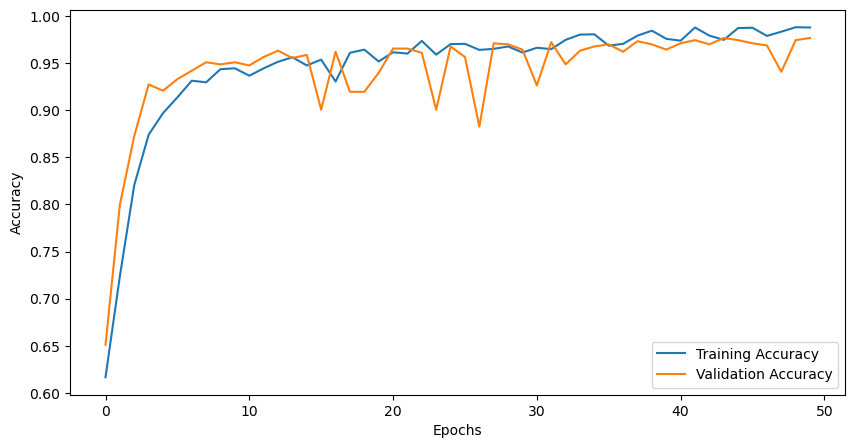

In [17]:
# Improve Accuracy
# Build the improved model
inputs = Input(shape=(train_images.shape[1],)) 
hidden1 = Dense(64, activation="relu")(inputs)  # First hidden layer with 64 neurons
hidden2 = Dense(32, activation="relu")(hidden1)  # Second hidden layer with 32 neurons
outputs = Dense(1, activation="sigmoid")(hidden2)  # Changed activation to sigmoid for binary classification
improved_model = Model(inputs, outputs)

improved_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the improved model
history_improved = improved_model.fit(train_images, train_labels, epochs=50, batch_size=32, validation_data=(test_images, test_labels))

# Evaluate accuracy
train_predictions_improved = improved_model.predict(train_images).squeeze()
train_predictions_improved = train_predictions_improved > 0.5
train_accuracy_improved = np.mean(train_predictions_improved == train_labels)

test_predictions_improved = improved_model.predict(test_images).squeeze()
test_predictions_improved = test_predictions_improved > 0.5
test_accuracy_improved = np.mean(test_predictions_improved == test_labels)

print('Improved train accuracy with more layers:', train_accuracy_improved)
print('Improved test accuracy with more layers:', test_accuracy_improved)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history_improved.history['loss'], label='Training Loss')
plt.plot(history_improved.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history_improved.history['accuracy'], label='Training Accuracy')
plt.plot(history_improved.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
